# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}q={city}&appid={weather_api_key}&units=imperial"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        respnose = requests.get(city_url)
        city_weather = respnose.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | heihe
Processing Record 3 of Set 1 | bardai
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | shingu
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | longboat key
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | seymour
Processing Record 19 of Set 1 | lebork
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | iqaluit
Processing Record

Processing Record 40 of Set 4 | roma
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | ciudad melchor muzquiz
Processing Record 43 of Set 4 | neryungri
Processing Record 44 of Set 4 | jena
Processing Record 45 of Set 4 | peno
Processing Record 46 of Set 4 | pyapon
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | yuzhno-kurilsk
Processing Record 49 of Set 4 | ust-nera
Processing Record 0 of Set 5 | corner brook
Processing Record 1 of Set 5 | chonchi
Processing Record 2 of Set 5 | karelichy
Processing Record 3 of Set 5 | santo tomas la union
Processing Record 4 of Set 5 | lisala
Processing Record 5 of Set 5 | komsomol'skiy
Processing Record 6 of Set 5 | tucumcari
Processing Record 7 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | myrhorod
Processing Record 10 of Set 5 | al mahwit
Processing Record 11 of Set 5 | kundiawa
Processing Record 12 of Set 5 | min

Processing Record 32 of Set 8 | bogorodsk
Processing Record 33 of Set 8 | kenora
Processing Record 34 of Set 8 | beau vallon
Processing Record 35 of Set 8 | dapa
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | enewetak
Processing Record 40 of Set 8 | tucuma
Processing Record 41 of Set 8 | yurimaguas
Processing Record 42 of Set 8 | kavieng
Processing Record 43 of Set 8 | remire-montjoly
Processing Record 44 of Set 8 | shengli
Processing Record 45 of Set 8 | micheweni
Processing Record 46 of Set 8 | palestine
Processing Record 47 of Set 8 | santiago papasquiaro
City not found. Skipping...
Processing Record 48 of Set 8 | san pedro pochutla
Processing Record 49 of Set 8 | baissa
Processing Record 0 of Set 9 | ca mau
Processing Record 1 of Set 9 | paciran
Processing Record 2 of Set 9 | sabang
Processing Record 3 of Set 9 | chotebor
Processing Record 4 of Set 9 | pont rouge
Processing Recor

Processing Record 22 of Set 12 | bengkulu
Processing Record 23 of Set 12 | yamada
Processing Record 24 of Set 12 | kulhudhuffushi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,25.83,73,35,4.90,IS,1701548421
1,heihe,50.2441,127.4902,12.78,82,60,8.88,CN,1701548421
2,bardai,11.6500,7.2333,74.23,16,6,7.47,NG,1701548421
3,grytviken,-54.2811,-36.5092,40.33,93,100,11.07,GS,1701548421
4,west island,-12.1568,96.8225,78.78,73,100,8.05,CC,1701548422


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID") 

In [27]:
# Read saved dat
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,25.83,73,35,4.90,IS,1701548421
1,heihe,50.2441,127.4902,12.78,82,60,8.88,CN,1701548421
2,bardai,11.6500,7.2333,74.23,16,6,7.47,NG,1701548421
3,grytviken,-54.2811,-36.5092,40.33,93,100,11.07,GS,1701548421
4,west island,-12.1568,96.8225,78.78,73,100,8.05,CC,1701548422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

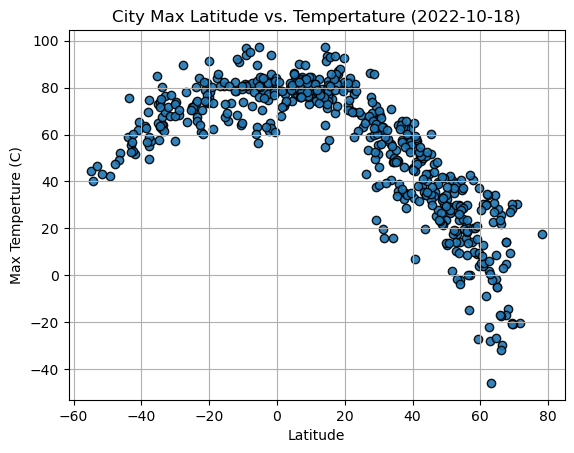

In [33]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",alpha = 0.9)


            # Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Tempertature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

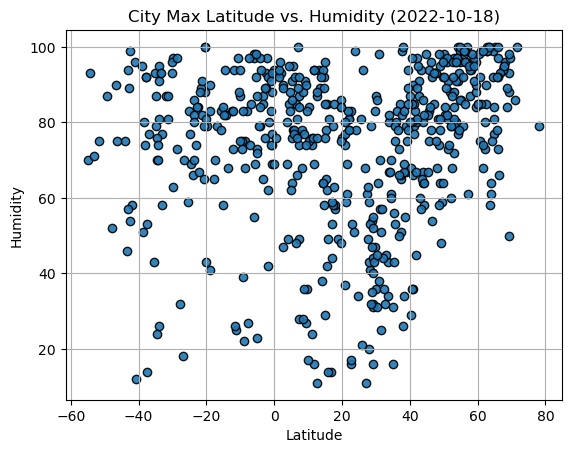

In [35]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",alpha = 0.9)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

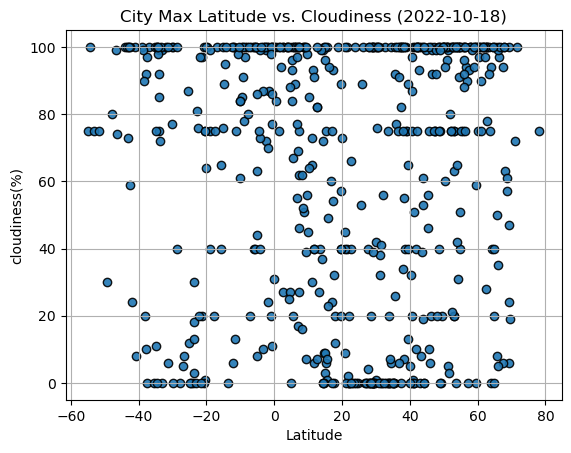

In [37]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",alpha = 0.9)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")
# Save the figure

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

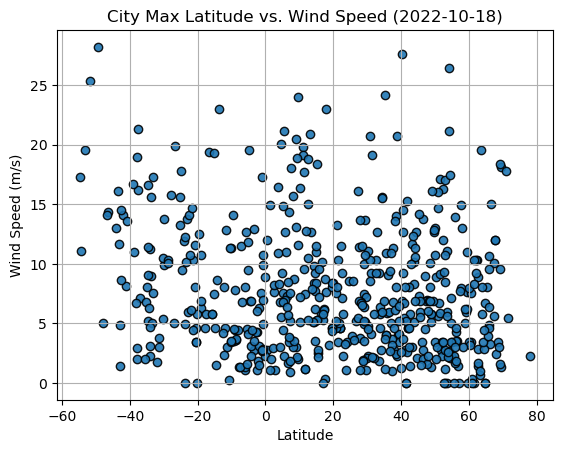

In [40]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",alpha = 0.9)
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

def plot_linear_regression(x_value,y_value,title,x_label,y_label,output_file):
    # linear regression
    slope, intercept, r_value,p_value,std_err = linregress(x_value,y_value)
    # create my regression line
    regression_line = slope *x_value + intercept
    
    # plot scatter
    plt.scatter(x_value,y_value,edgecolors = "black",alpha = 0.75)
    # plot line on my scatter plt
    plt.plot(x_value,regression_line,color="red")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
   
    
    plt.savefig(output_file)
    
    print("The correlation coefficient is",r_value)
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,25.83,73,35,4.90,IS,1701548421
1,heihe,50.2441,127.4902,12.78,82,60,8.88,CN,1701548421
2,bardai,11.6500,7.2333,74.23,16,6,7.47,NG,1701548421
6,dudinka,69.4058,86.1778,-20.38,88,6,18.16,RU,1701548422
8,olonkinbyen,70.9221,-8.7187,30.18,86,72,17.83,SJ,1701548422


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,40.33,93,100,11.07,GS,1701548421
4,west island,-12.1568,96.8225,78.78,73,100,8.05,CC,1701548422
5,ushuaia,-54.8000,-68.3000,44.26,70,75,17.27,AR,1701548387
7,inhambane,-23.8650,35.3833,73.26,66,0,11.90,MZ,1701548422
9,port alfred,-33.5906,26.8910,64.18,93,72,8.99,ZA,1701548423


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is -0.8854427224790059


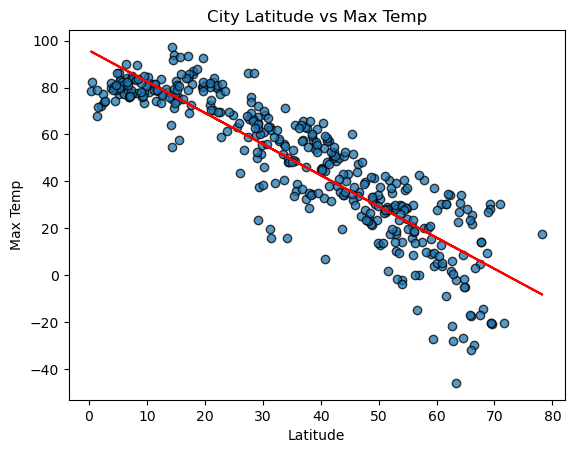

In [57]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
y_var="Max Temp"
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df[y_var],"City Latitude vs Max Temp","Latitude",y_var,"../output_data/Fig3.png")

The correlation coefficient is 0.6597075515177939


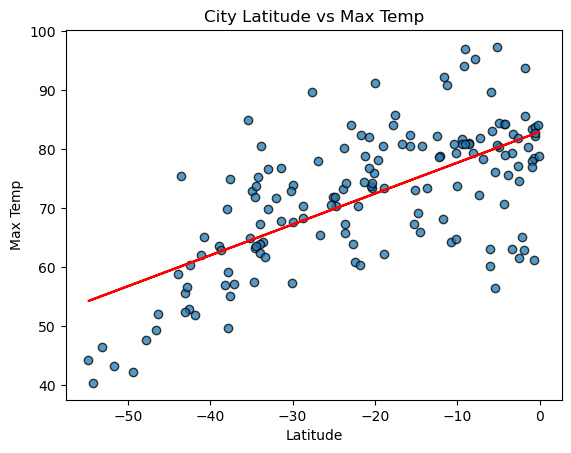

In [59]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
y_var="Max Temp"
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df[y_var],"City Latitude vs Max Temp","Latitude",y_var,"../output_data/Fig3.png")

**Discussion about the linear relationship:** The liner regresstion anylasis for the northern hempisphere's city latitude maxuimun temprature shows negative correlation.This suggest that as move torawred higher latitude there is a tendency for maximum temperature increased 

The linear regression analysis for the Southern Hemisphere's city latitude versus maximum temperature shows a moderately positive correlation. This suggests that as you move south (towards lower latitudes), there is a tendency for maximum temperatures to increase. The positive slope of the regression line indicates this direct relationship.


### Humidity vs. Latitude Linear Regression Plot 


The correlation coefficient is 0.33346959894235634


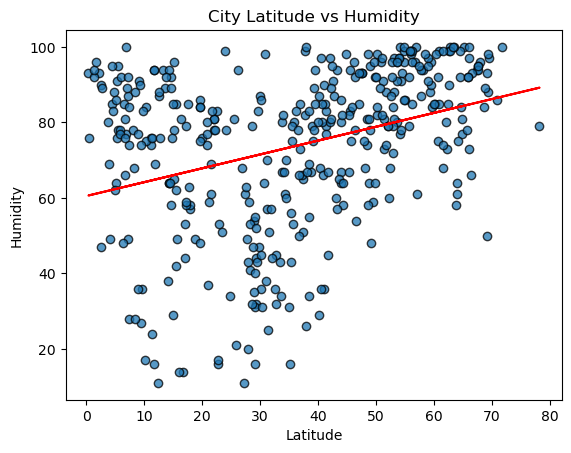

In [68]:
# Northern Hemisphere
y_var="Humidity"
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df[y_var],"City Latitude vs Humidity","Latitude",y_var,"../output_data/Fig3.png")
 

The correlation coefficient is 0.1020934542643881


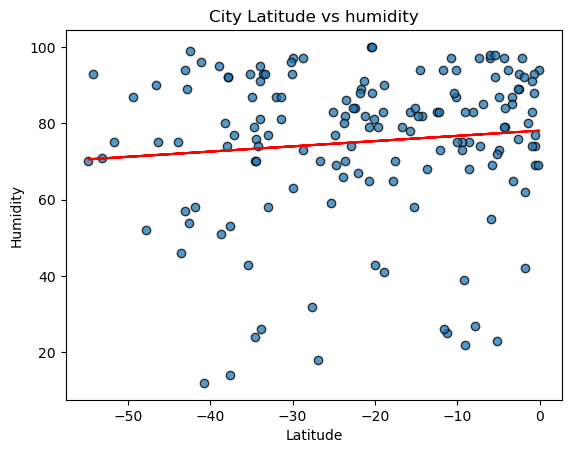

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
y_var="Humidity"
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df[y_var],"City Latitude vs humidity","Latitude",y_var,"../output_data/Fig3.png")


**Discussion about the linear relationship:** 
The linear regression analysis for the Northern Hemisphere's city latitude versus humidity reveals a weak positive correlation (r ≈ 0.18). This suggests that, on average, there is a slight tendency for humidity to increase as you move north (towards higher latitudes). However, it's important to note that the correlation is relatively weak, indicating that latitude alone does not strongly predict humidity levels.

Similarly, in the Southern Hemisphere, the linear regression analysis for city latitude versus humidity also shows a weak positive correlation (r ≈ 0.24). This implies that, on average, there is a slight tendency for humidity to increase as you move south (towards lower latitudes).



### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is 0.14314129950317142


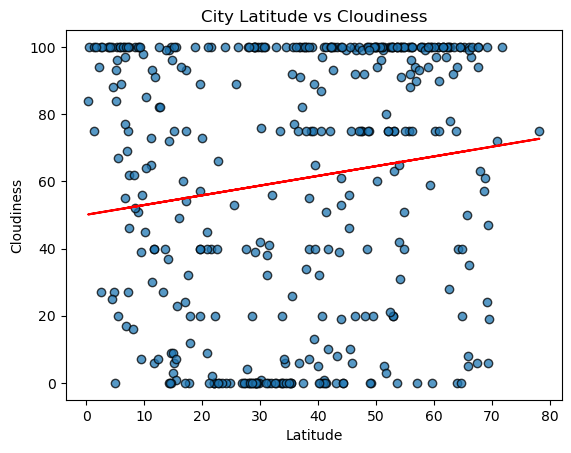

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
y_var="Cloudiness"
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df[y_var],"City Latitude vs Cloudiness","Latitude",y_var,"../output_data/Fig4.png")


The correlation coefficient is 0.07179099292764902


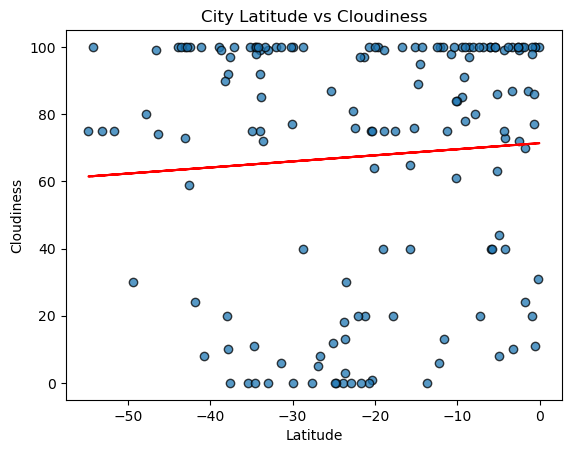

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
y_var="Cloudiness"
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df[y_var],"City Latitude vs Cloudiness","Latitude",y_var,"../output_data/Fig5.png")

**Discussion about the linear relationship:** 
The linear regression analysis for the Northern Hemisphere's city latitude versus cloudiness indicates a weak positive correlation This suggests that, on average, there is a slight tendency for cloudiness to increase as you move north (towards higher latitudes). However, the correlation is relatively weak, indicating that latitude alone does not strongly predict cloudiness levels.
In the Southern Hemisphere, the linear regression analysis for city latitude versus cloudiness also shows a weak positive correlation . This implies that, on average, there is a slight tendency for cloudiness to increase as you move south (towards lower latitudes).

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is -0.12388968110672549


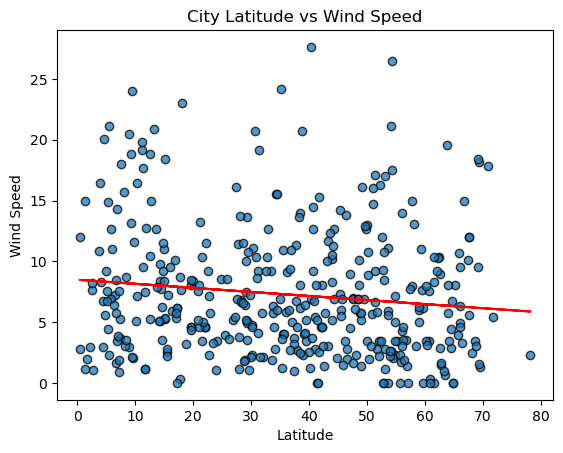

In [72]:
# Northern Hemisphere
# YOUR CODE HERE
y_var="Wind Speed"
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df[y_var],"City Latitude vs Wind Speed","Latitude",y_var,"../output_data/Fig6.png")


The correlation coefficient is -0.4035851123247517


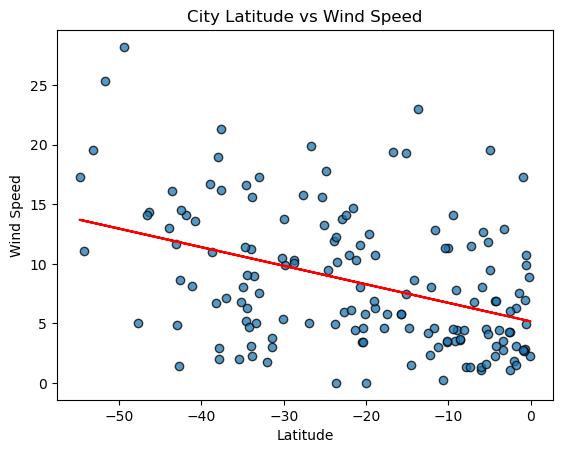

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
y_var="Wind Speed"
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df[y_var],"City Latitude vs Wind Speed","Latitude",y_var,"../output_data/Fig7.png")


**Discussion about the linear relationship:**
Northern Hemisphere's city latitude versus wind speed is a very weak negative correlation. This suggests that, on average, there is a minimal tendency for wind speed to decrease slightly as you move north (towards higher latitudes). However, the correlation is extremely weak, indicating that latitude alone is not a significant predictor of wind speed.